# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [483]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [484]:
df = pd.read_csv("craftcans.csv")
df.head(2)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26


## How many rows do you have in the data? What are the column types?

In [485]:
df.shape

(2416, 7)

#### There are 2416 rows in the data.

In [486]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

#### The column types are all object.

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [505]:
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

#### The top ten producers are Brewery Vivant, Oskar Blues Brewery, Sun King Brewing Company, Cigar City Brewing Company, Sixpoint Craft Ales, Hopworks Urban Brewery, Stevens Point Brewery, Great Crescent Brewery, 21st Amendment Brewery and Bonfire Brewing Company. 

## What is the most common ABV? (alcohol by volume)

In [506]:
df['ABV'].value_counts().head(1)

ABV
5.0    215
Name: count, dtype: int64

In [489]:
#### The most common ABV is 5.00%. 

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [507]:
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [491]:
df['ABV'] = df['ABV'].str.replace("%", "")
df['ABV']

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [492]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [493]:
df['ABV'].median()

np.float64(5.6)

#### The median of the ABV of the beer is 5.6 percent.

In [508]:
df['ABV'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [495]:
df['ABV'].isna().value_counts()
# isna(): identifies which values are NaN (missing), returning True for missing values and False otherwise
# value_counts(): counts the number of occurrences of True and False

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [496]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

#### The top 10 cities in the US for canned craft beer are Grand Rapids, Chicago, Portland, Indianapolis, San Diego, Boulder, Denver, Brooklyn, Seattle and Longmont. 

## List all of the beer from Brooklyn, NY

In [509]:
brooklyn = df[df['Location'] == 'Brooklyn, NY']
brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most different cans of beer?

In [498]:
brooklyn['Brewery'].value_counts()

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

#### Sixpoint Craft Ales puts out the most different cans of beer. 

## What are the five most common styles of beer produced by Sixpoint?

In [499]:
brooklyn[brooklyn['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

#### American IPA, Baltic Porter, American Double / Imperial IPA, German Pilsener and Cream Ale are the five most common styles of beer produced by Sixpoint.

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [500]:
df['Location'].isna().value_counts()

Location
False    2410
True        6
Name: count, dtype: int64

In [501]:
# If you come across missing data, count it as NOT New York state
df[df['Location'].str.contains("NY", na=False)]
# .contains("HISP"): checks if the substring "HISP" exists in each element of the series (row-wise)
# True if the substring "HISP" is present, False if it is not
# Also False if missing data

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [510]:
df[df['Location'].str.contains("NY", na=False)]['Brewery'].value_counts()

Brewery
Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Chatham Brewing                   2
Montauk Brewing Company           2
Bomb Beer Company                 2
Upstate Brewing Company           2
Newburgh Brewing Company          1
Southampton Publick House         1
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [503]:
df[df['Style'].str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [504]:
df['IBU'].mean()

KeyError: 'IBU'

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [511]:
df = pd.read_csv("craftcans.csv", na_values=['Does not apply'])
df['IBUs'].mean().round(2)

np.float64(42.71)

#### The average IBUs is 42.71.

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

In [ ]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [ ]:
ibus_75th_percentile = df['IBUs'].quantile(0.75)
df[df['IBUs'] > ibus_75th_percentile]

## List all of the beers with IBUs below the 25th percentile

In [ ]:
ibus_25th_percentile = df['IBUs'].quantile(0.25)
df[df['IBUs'] > ibus_25th_percentile]

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [512]:
# type---style
df.groupby('Style')['IBUs'].median().sort_values(ascending=False, na_position='last') # na_values=['Does not apply']

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [ ]:
high = df[df['IBUs'] > ibus_75th_percentile]
high['Style'].value_counts().head(5)

#### American IPA, American Double / Imperial IPA, American Pale Ale (APA), American Black Ale and American Strong Ale are the most common 5 styles of high-IBU beer.

In [514]:
low = df[df['IBUs'] > ibus_25th_percentile]
low['Style'].value_counts().head(5)

Style
American IPA                      301
American Pale Ale (APA)           150
American Double / Imperial IPA     75
American Amber / Red Ale           62
American Porter                    33
Name: count, dtype: int64

#### American IPA, American Pale Ale (APA), American Double / Imperial IPA, American Amber / Red Ale and American Porter are the most common 5 styles of low-IBU beer.

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [513]:
wheat_beers = df[df['Style'].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]
wheat_beers['IBUs'].mean().round(2)

np.float64(18.98)

#### The average IBU of wheat beers is 18.98.

## Draw a histogram of the IBUs of those beers

<Axes: >

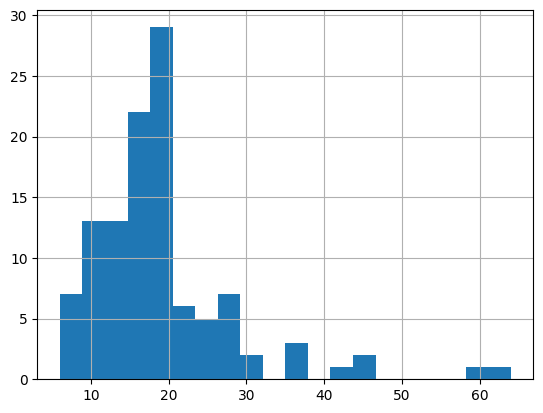

In [515]:
wheat_beers['IBUs'].hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [516]:
with_IPA = df[df['Style'].str.contains("IPA", na=False)]
with_IPA['IBUs'].mean().round(2)

np.float64(71.95)

#### The average IBU of any style with "IPA" in it is 71.95.

In [ ]:
with_IPA['IBUs'].hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

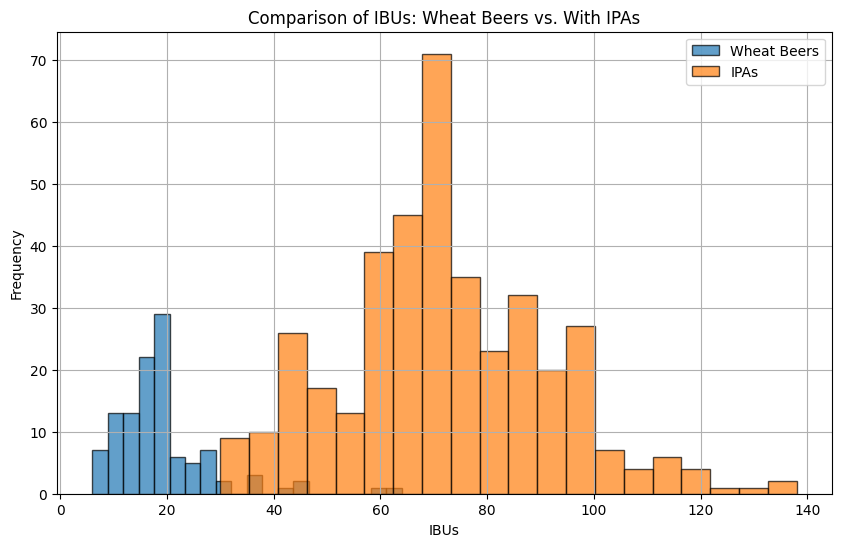

In [517]:
import matplotlib.pyplot as plt

# Plot both histograms on the same figure
plt.figure(figsize=(10, 6))

# Histogram for Wheat Beers
plt.hist(wheat_beers['IBUs'].dropna(), bins=20, alpha=0.7, label='Wheat Beers', edgecolor='black')

# Histogram for With IPAs
plt.hist(with_IPA['IBUs'].dropna(), bins=20, alpha=0.7, label='IPAs', edgecolor='black')

# Customize the plot
plt.title('Comparison of IBUs: Wheat Beers vs. With IPAs')
plt.xlabel('IBUs')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [519]:
# Convert ABV to numeric after removing any non-numeric characters (e.g., '%')
wheat_beers['ABV'] = wheat_beers['ABV'].str.replace('%', '', regex=False).astype(float)
with_IPA['ABV'] = with_IPA['ABV'].str.replace('%', '', regex=False).astype(float)

# Calculate the mean ABV and round to 2 decimal places
mean_abv_wheat = wheat_beers['ABV'].mean().round(2)
mean_abv_ipa = with_IPA['ABV'].mean().round(2)
print(mean_abv_wheat)
print(mean_abv_ipa)

5.04
6.88


/var/folders/ht/lsndydln7jl_5ttkmj9tcl7c0000gn/T/ipykernel_79126/3149768227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheat_beers['ABV'] = wheat_beers['ABV'].str.replace('%', '', regex=False).astype(float)
/var/folders/ht/lsndydln7jl_5ttkmj9tcl7c0000gn/T/ipykernel_79126/3149768227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_IPA['ABV'] = with_IPA['ABV'].str.replace('%', '', regex=False).astype(float)


#### The alcohol percentage between wheat beers vs. IPAs is similar.

## Good work!